## 分析非法网站的顶级域名特征

分析非法网站的顶级域名的数量分布情况

In [137]:
# encoding:utf-8
from collections import Counter,defaultdict
import tldextract
from collections import Counter,OrderedDict

In [138]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import  median
from scipy.stats import mode

In [139]:
# 读取数据
gam_sites_data = np.load('gam_dm_info.npy')
por_sites_data = np.load('por_dm_info.npy')

In [146]:
def extract_links_tld(sites_data):
    """提取出链接和域名
    """
    tld_domains = []
    for site_data in sites_data:
        if  site_data:
            
            # 打印某类型的顶级域名网站
#             if tldextract.extract(site_data['domain']).suffix == 'gov.cn':
#                 print site_data['domain']
#                 print site_data['outer_domains']
            
            for url in site_data['outer_urls']:
                ext = tldextract.extract(url)
                if ext.suffix:
#                     if ext.suffix=='racing':
#                         print site_data['domain']
                    tld_domains.append(ext.suffix)
    return tld_domains

In [147]:
def manage_data(tld_domains,n=15):
    
    total_domain = len(tld_domains) # 域名总数
    tld_domains = Counter(tld_domains)
    tld_domains = OrderedDict(tld_domains.most_common(n))

    x = np.arange(len(tld_domains))
    x_ticks = tld_domains.keys()

    y = tld_domains.values()
    y = [i/float(total_domain) for i in y]
    
    return x, x_ticks,y

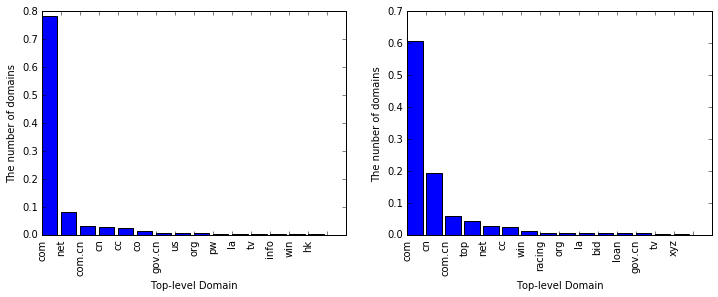

In [148]:

gam_tld_domains = extract_links_tld(gam_sites_data)
gam_x,gam_x_ticks, gam_y = manage_data(gam_tld_domains)

por_tld_domains = extract_links_tld(por_sites_data)
por_x,por_x_ticks, por_y = manage_data(por_tld_domains)
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 4))

# 赌博网站
ax0.set_xlabel('Top-level Domain')
ax0.set_ylabel('The number of domains')
ax0.set_xticklabels(gam_x_ticks,rotation=90);
ax0.bar(gam_x,gam_y);
# 设置x轴的显示内容
start, end = ax0.get_xlim()
ax0.xaxis.set_ticks(np.arange(start, end, 1))


# 色情网站
ax1.set_xlabel('Top-level Domain')
ax1.set_ylabel('The nunber of domains')
ax1.bar(por_x,por_y);
ax1.set_xticklabels(por_x_ticks,rotation=90);
start, end = ax0.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 1));

赌博和色情网站的顶级域名数量分布：
* 两类非法域名，.com都是使用最多的顶级域名
* cn域名虽然实名验证，但依然有，但管控方便。
